히트맵(Heat Map)

In [ ]:
# 2차원 데이터의 상관관계나 패턴을 색상으로 시각화할 수 있는 강력한 도구입니다.
# 보통 seaborn의 heatmap() 함수를 많이 사용하며, 특히 종목 간 수익률 상관관계 분석 등에 적합합니다.

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


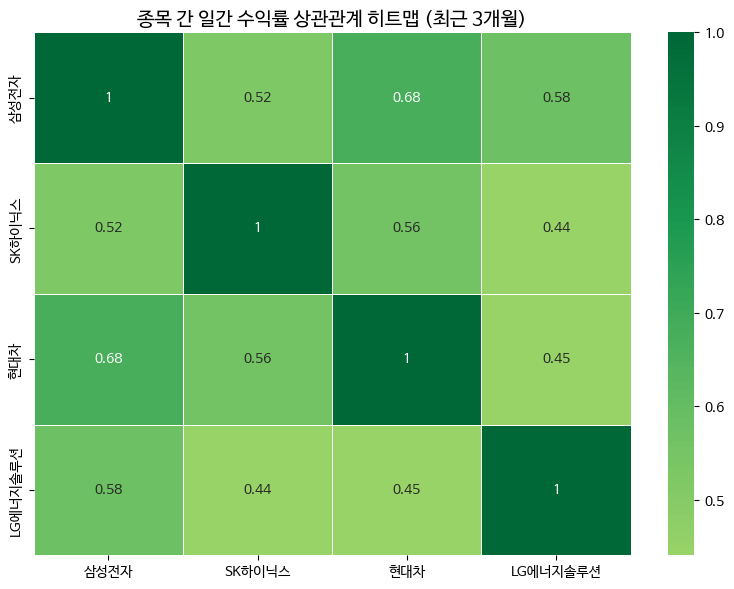

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock
import datetime

# ▶️ 분석 종목
tickers = {
    "005930": "삼성전자",
    "000660": "SK하이닉스",
    "005380": "현대차",
    "373220": "LG에너지솔루션"
}

# ▶️ 날짜 범위
end = datetime.datetime.today()
start = end - datetime.timedelta(days=90)

# ▶️ 종목별 수익률 저장용
returns_df = pd.DataFrame()

# ▶️ 수익률 수집
for code, name in tickers.items():
    df = stock.get_market_ohlcv_by_date(start.strftime("%Y%m%d"), end.strftime("%Y%m%d"), code)
    if df.empty:
        continue
    df = df[['종가']].copy()
    df.rename(columns={'종가': name}, inplace=True)
    returns_df = pd.concat([returns_df, df], axis=1)

# ▶️ 일간 수익률 계산
daily_returns = returns_df.pct_change().dropna()

# ▶️ 상관계수 계산
corr_matrix = daily_returns.corr()

# ▶️ 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", center=0, linewidths=0.5)
plt.title("종목 간 일간 수익률 상관관계 히트맵 (최근 3개월)", fontsize=14)
plt.tight_layout()
plt.show()
